# **Q1**
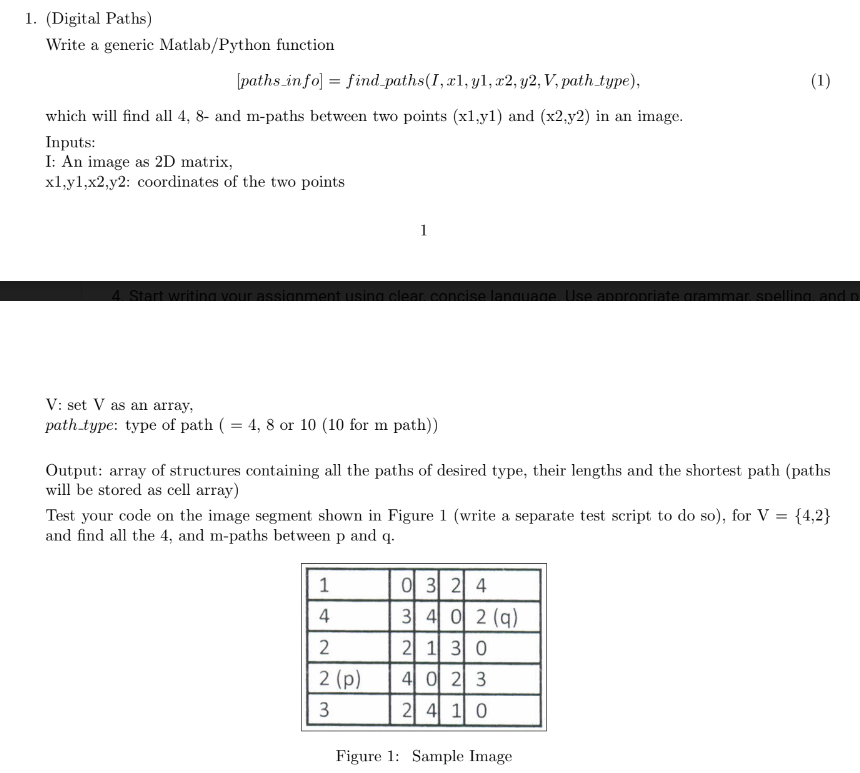

**Importing Libraries**

In [32]:
import numpy as np

In [33]:
# Defining class for creating pixel node object
class Pixel(object):

	def __init__(self, x, y, inten):
		self.intensity=inten
		self.x=x
		self.y=y
	
	def x_coord(self):
		return self.x

	def y_coord(self):
		return self.y

	def intensity(self):
		return self.intensity
	
	def __str__(self):
		return '('+str(self.x)+','+str(self.y)+'):'+str(self.intensity)

# Defining class for listing an edge object
class Edge(object):

	def __init__(self,src,dest):
		self.source=src
		self.destination=dest

	def src(self):
		return self.source

	def dest(self):
		return self.destination
	
# Printing the path
def path(l):
	ans=''
	for i in range(len(l)):
		ans+=str(l[i])
		if i!=len(l)-1:
			ans+='->'
	return ans

# Defining graph for adding edges and nodes and finding neighbors
class Graph(object):

	def __init__(self):
		self.nodes=[]
		self.edges={}
		self.visit=[]

	def addingNode(self, node):
		if node not in self.nodes:
			self.nodes.append(node)
			self.edges[node]=[]
		else:
			raise ValueError('Node already visited')
			
	def addingEdge(self, edge):
		src=edge.src()
		dest=edge.dest()
		if src in self.nodes and dest in self.nodes:
			self.edges[src].append(dest)
			self.edges[dest].append(src)
		else:
			raise ValueError("Node not in graph")

	def neighbors(self, node):
		return self.edges[node]

	# Defining depth first search function inside graph to find all paths pf a certain type between source and destination
	def DFS(self,g,src,dest,pth):
		self.visit.append(src)
		pth.append(src)
		if src==dest:
			print("length: "+ str(len(pth)-1) +"  path: " +path(pth))
		else:
			for neigh in g.neighbors(src):
				if neigh not in self.visit:
					self.DFS(g,neigh,dest,pth)
		pth.pop()
		self.visit.remove(src)

	def __str__(self):
		res=''
		for src in self.nodes:
			for dest in self.edges[src]:
				res=res+'('+str(src.x_coord())+','+str(src.y_coord())+') ->' + \
								'('+str(dest.x_coord())+','+str(dest.y_coord())+')\n'
		return res[:-1]

**Function to find all 4, 8 and m-paths between 2 points in an image**

In [34]:
# To update the graph with 4-adjacent paths from p to q and connecting 4-adjacent edges in the graph
def four_adj(nodes, V, g):
    for i in range(len(nodes)):
        a = nodes[i].x_coord()
        b = nodes[i].y_coord()
        src_int = int(str(nodes[i])[-1])
        N4_neighbors = [[a, b+1], [a, b-1], [a-1, b], [a+1, b]]
        j = i+1
        cnt = 0

        while j < len(nodes) or cnt == 4:
            dest_a = nodes[j].x_coord()
            dest_b = nodes[j].y_coord()
            dest_int = int(str(nodes[j])[-1])

            # checking for the condition whether the instensity of source and destination are from set V
            # and the destination lies in the n8 neighbors of source
            if src_int in V and dest_int in V:
                for vertice in N4_neighbors:
                    if vertice[0] == dest_a and vertice[1] == dest_b:
                        g.addingEdge(Edge(nodes[i], nodes[j]))
                        cnt += 1
            j += 1
    return g

# to update the graph with 8-adjacent paths from p to q and connecting 8-adjacent edges in the graph
def eight_adj(nodes, V, g):
    for i in range(len(nodes)):
        a = nodes[i].x_coord()
        b = nodes[i].y_coord()
        src_int = int(str(nodes[i])[-1])
        N8_neighbors = [[a, b+1], [a, b-1], [a-1, b], [a+1, b],
                        [a-1, b-1], [a+1, b+1], [a-1, b+1], [a+1, b-1]]
        j = i+1
        cnt = 0

        while j < len(nodes) or cnt == 8:
            dest_a = nodes[j].x_coord()
            dest_b = nodes[j].y_coord()
            dest_int = int(str(nodes[j])[-1])

            # checking for the condition whether the instensity of source and destination are from set V
            # and the destination lies in the n8 neighbors of source
            if src_int in V and dest_int in V:
                for vertice in N8_neighbors:
                    if vertice[0] == dest_a and vertice[1] == dest_b:
                        g.addingEdge(Edge(nodes[i], nodes[j]))
                        cnt += 1
            j += 1
    return g

# to update the graph with m-adjacent paths from p to q and connecting m-adjacent edges in the graph
def m_adj(nodes, V, g):
    for i in range(len(nodes)):
        a = nodes[i].x_coord()
        b = nodes[i].y_coord()
        src_int = int(str(nodes[i])[-1])
        srcN4_neighbors = [[a, b+1], [a, b-1], [a-1, b], [a+1, b]]
        j = i+1

        while j < len(nodes):
            flag1 = 0
            flag2 = 0
            dest_a = nodes[j].x_coord()
            dest_b = nodes[j].y_coord()
            dest_int = int(str(nodes[j])[-1])

            if src_int in V and dest_int in V:

                # checking for the first condition of m-path adjacency i.e. the destination is in the n4 neighbors of source
                for vertice in srcN4_neighbors:
                    if vertice[0] == dest_a and vertice[1] == dest_b:
                        g.addingEdge(Edge(nodes[i], nodes[j]))
                        flag1 = 1
                        
                # checking for the second condition i.e. the destination is in the diagonal neighbors of source and intersection of
                # n4 neighbors of source and destination are not from set V
                if flag1 != 1:
                    srcND_neighbors = [[a-1, b-1],
                                       [a+1, b+1], [a-1, b+1], [a+1, b-1]]
                    destN4_neighbors = [
                        [dest_a+1, dest_b], [dest_a, dest_b+1], [dest_a-1, dest_b], [dest_a, dest_b-1]]
                    for q in srcND_neighbors:
                        if q[0] == dest_a and q[1] == dest_b:
                            flag2 = 1
                    if flag2 == 1:
                        intersect = []
                        for common in srcN4_neighbors:
                            if common in destN4_neighbors:
                                intersect.append(common)
                        cnt = len(intersect)
                        while intersect:
                            tmp = intersect.pop()
                            for node in nodes:
                                x = node.x_coord()
                                y = node.y_coord()
                                if tmp[0] == x and tmp[1] == y:
                                    if int(str(node)[-1]) not in V:
                                        cnt -= 1
                        if cnt == 0:
                            g.addingEdge(Edge(nodes[i], nodes[j]))
            j += 1
    return g


**Function for extracting the shortest path and designing the graph for the image matrix**

In [35]:
# defining BFS for extracting the shortest path between p and q
def BFS(g, src, dest):
    queue = [[src]]
    while queue:
        ans = queue.pop(0)
        last = ans[-1]
        if last == dest:
            return ans
        for neigh in g.neighbors(last):
            if neigh not in ans:
                new = ans+[neigh]
                queue.append(new)
    return None

# creating image matrix and pixel nodes inside it and finding the path type requested with the shortest path
def design(mat, p, q, V, adj):
    nodes = []
    src = None
    dest = None
    m = len(mat)
    n = len(mat[0])
    for x in range(m):
        for y in range(n):
            nodes.append(Pixel(x, y, mat[x][y]))
            if x == p[0] and y == p[1]:
                src = nodes[-1]
            if x == q[0] and y == q[1]:
                dest = nodes[-1]

    # creating a graph and adding nodes to it
    g = Graph()
    for node in nodes:
        g.addingNode(node)
        
    # adding edges to the graph based on the asked path type
    if adj == '4':
        g = four_adj(nodes, V, g)
    elif adj == '8':
        g = eight_adj(nodes, V, g)
    elif adj == 'm':
        g = m_adj(nodes, V, g)
    else:
        g = None

    if g == None:
        print("Incorrect adjacency path entered")
        return None
    if src == None or dest == None:
        print("Incorrect source and destination given")
        return None
        
    # calling the depth first search function to find all the paths of a particular type between source and destination
    pth = []
    print("All paths of " + adj + " type with their lengths")
    g.DFS(g, src, dest, pth)

    # calling the breadth first search function to find the shortest path
    res = BFS(g, src, dest)
    if res:
        # storing the path information in the array
        print("Shortest path of "+adj+" type.")
        ans = [adj]
        ans.append(len(res)-1)
        ans.append(path(res))
        print(ans)
    else:
        print("No path exists of "+adj+" type")


**Testing code with a given example**

In [36]:
# testing the given image in the above code and extracting all the shortest 4, 8, and m-paths.
mat = np.array([[1, 0, 3, 2, 4], [4, 3, 4, 0, 2], [
               2, 2, 1, 3, 0], [2, 4, 0, 2, 3], [3, 2, 4, 1, 0]])
p = [3, 0]
q = [1, 4]
V = [4, 2]
adj1 = '4'
adj2 = '8'
adj3 = 'm'

# The array contains path type, length of the shortest path and the shortest path respectively
design(mat, p, q, V, adj1)
design(mat, p, q, V, adj2)
design(mat, p, q, V, adj3)


All paths of 4 type with their lengths
No path exists of 4 type
All paths of 8 type with their lengths
length: 7  path: (3,0):2->(2,0):2->(1,0):4->(2,1):2->(1,2):4->(0,3):2->(0,4):4->(1,4):2
length: 6  path: (3,0):2->(2,0):2->(1,0):4->(2,1):2->(1,2):4->(0,3):2->(1,4):2
length: 6  path: (3,0):2->(2,0):2->(2,1):2->(1,2):4->(0,3):2->(0,4):4->(1,4):2
length: 5  path: (3,0):2->(2,0):2->(2,1):2->(1,2):4->(0,3):2->(1,4):2
length: 7  path: (3,0):2->(2,0):2->(3,1):4->(2,1):2->(1,2):4->(0,3):2->(0,4):4->(1,4):2
length: 6  path: (3,0):2->(2,0):2->(3,1):4->(2,1):2->(1,2):4->(0,3):2->(1,4):2
length: 5  path: (3,0):2->(2,1):2->(1,2):4->(0,3):2->(0,4):4->(1,4):2
length: 4  path: (3,0):2->(2,1):2->(1,2):4->(0,3):2->(1,4):2
length: 8  path: (3,0):2->(3,1):4->(2,0):2->(1,0):4->(2,1):2->(1,2):4->(0,3):2->(0,4):4->(1,4):2
length: 7  path: (3,0):2->(3,1):4->(2,0):2->(1,0):4->(2,1):2->(1,2):4->(0,3):2->(1,4):2
length: 7  path: (3,0):2->(3,1):4->(2,0):2->(2,1):2->(1,2):4->(0,3):2->(0,4):4->(1,4):2
length: 6 